## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

print("Libraries imported successfully")
print("=" * 60)

Libraries imported successfully


## 1: Loading original dataset

In [49]:
print(" Loading original dataset.")

df = pd.read_csv('../data//telco_churn.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 3 rows:")
display(df.head(3))
print("\nData types:")
print(df.dtypes)


Step 1: Loading original dataset...
Dataset shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 3 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## 2: Initial data inspection

In [50]:
print("\nInitial data inspection.")

print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print(f"\nTotalCharges unique values (first 10): {df['TotalCharges'].unique()[:10]}")
print(f"Empty strings in TotalCharges: {(df['TotalCharges'] == ' ').sum()}")

print(f"\nChurn distribution:")
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)


Step 2: Initial data inspection...
Missing values per column:
Series([], dtype: int64)

TotalCharges unique values (first 10): ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Empty strings in TotalCharges: 11

Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


## 3.Data cleaning

In [51]:
print("\nData cleaning.")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

nan_count = df['TotalCharges'].isnull().sum()
print(f"TotalCharges NaN after conversion: {nan_count}")

df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Data cleaning complete")



Step 3: Data cleaning...
TotalCharges NaN after conversion: 11
Data cleaning complete


## 4.Preparing features and target


Step 4: Preparing features and target...
Features shape: (7043, 19)
Target shape: (7043,)

Target distribution:
Class 0 (No Churn): 5174 samples (73.5%)
Class 1 (Churn): 1869 samples (26.5%)


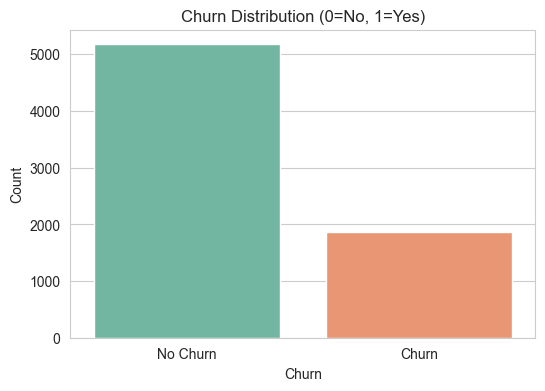

In [52]:
print("\nPreparing features and target.")

df = df.drop('customerID', axis=1)

X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(f"Class 0 (No Churn): {sum(y == 0)} samples ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"Class 1 (Churn): {sum(y == 1)} samples ({sum(y == 1)/len(y)*100:.1f}%)")


plt.figure(figsize=(6, 4))
sns.countplot(x=y.values, palette='Set2')
plt.title('Churn Distribution (0=No, 1=Yes)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


## 5: Identifying column types.

In [56]:
print("\nSIdentifying column types...")


numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")


categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_vals = X[col].nunique()
    print(f"  - {col} ({unique_vals} unique values)")

print(f"\nTotal features: {X.shape[1]}")


 Identifying column types...
Numerical columns (3):
  - tenure
  - MonthlyCharges
  - TotalCharges

Categorical columns (16):
  - gender (2 unique values)
  - SeniorCitizen (2 unique values)
  - Partner (2 unique values)
  - Dependents (2 unique values)
  - PhoneService (2 unique values)
  - MultipleLines (3 unique values)
  - InternetService (3 unique values)
  - OnlineSecurity (3 unique values)
  - OnlineBackup (3 unique values)
  - DeviceProtection (3 unique values)
  - TechSupport (3 unique values)
  - StreamingTV (3 unique values)
  - StreamingMovies (3 unique values)
  - Contract (3 unique values)
  - PaperlessBilling (2 unique values)
  - PaymentMethod (4 unique values)

Total features: 19


## 6: Train-test split..

In [58]:
print("\nTrain-test split...")

# Split before preprocessing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape} (features), {y_train.shape} (target)")
print(f"Test set:     {X_test.shape} (features), {y_test.shape} (target)")

print(f"\nClass distribution:")
print(f"Train - Class 0: {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"Train - Class 1: {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"Test  - Class 0: {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"Test  - Class 1: {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)")



Train-test split...
Training set: (5634, 19) (features), (5634,) (target)
Test set:     (1409, 19) (features), (1409,) (target)

Class distribution:
Train - Class 0: 4139 (73.5%)
Train - Class 1: 1495 (26.5%)
Test  - Class 0: 1035 (73.5%)
Test  - Class 1: 374 (26.5%)


## 7: Creating preprocessing pipeline.

In [59]:
print("\nCreating preprocessing pipeline...")

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle any remaining missing
    ('scaler', StandardScaler())  # Scale for neural network
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

print("Preprocessing pipeline created")
print(f" Numerical columns: {len(numerical_cols)}")
print(f"  Categorical columns: {len(categorical_cols)}")



Creating preprocessing pipeline...
Preprocessing pipeline created
 Numerical columns: 3
  Categorical columns: 16


## 8.Applying preprocessing..

In [60]:
print("\nApplying preprocessing...")

print("Fitting preprocessor on training data...")
X_train_processed = preprocessor.fit_transform(X_train)

print("Transforming test data...")
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(cols)
    elif name == 'cat':
        encoder = transformer.named_steps['onehot']
        encoded_names = encoder.get_feature_names_out(cols)
        feature_names.extend(encoded_names)

print(f"\nPreprocessing complete!")
print(f"X_train processed shape: {X_train_processed.shape}")
print(f"X_test processed shape:  {X_test_processed.shape}")
print(f"Number of features:      {len(feature_names)}")

print(f"\nSample feature names:")
for i, name in enumerate(feature_names[:10]):
    print(f"  {i+1}. {name}")



Applying preprocessing...
Fitting preprocessor on training data...
Transforming test data...

Preprocessing complete!
X_train processed shape: (5634, 30)
X_test processed shape:  (1409, 30)
Number of features:      30

Sample feature names:
  1. tenure
  2. MonthlyCharges
  3. TotalCharges
  4. gender_Male
  5. SeniorCitizen_Yes
  6. Partner_Yes
  7. Dependents_Yes
  8. PhoneService_Yes
  9. MultipleLines_No phone service
  10. MultipleLines_Yes


## 9: Verifying preprocessing..

In [55]:
print("\n Verifying preprocessing...")

# Check for NaN values
print("Checking for NaN values:")
print(f"  X_train NaN count: {np.isnan(X_train_processed).sum()}")
print(f"  X_test NaN count:  {np.isnan(X_test_processed).sum()}")

# Check data ranges
print("\nChecking numerical feature ranges (should be scaled):")
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
for col in numerical_cols:
    if col in X_train_df.columns:
        print(f"  {col}: mean={X_train_df[col].mean():.2f}, std={X_train_df[col].std():.2f}")

# Check one-hot encoding
cat_features = [f for f in feature_names if f not in numerical_cols]
print(f"\nCategorical features encoded: {len(cat_features)}")



Step 9: Verifying preprocessing...
Checking for NaN values:
  X_train NaN count: 0
  X_test NaN count:  0

Checking numerical feature ranges (should be scaled):
  tenure: mean=-0.00, std=1.00
  MonthlyCharges: mean=-0.00, std=1.00
  TotalCharges: mean=0.00, std=1.00

Categorical features encoded: 27


## 10.Saving preprocessed data..

In [61]:
print("\n Saving preprocessed data...")

import os
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Create dictionary with all data
data_to_save = {
    'X_train': X_train_processed,
    'X_test': X_test_processed,
    'y_train': y_train.values,
    'y_test': y_test.values,
    'feature_names': feature_names,
    'preprocessor': preprocessor,
    'column_types': {
        'numerical': numerical_cols,
        'categorical': categorical_cols
    },
    'original_shapes': {
        'X_train_original': X_train.shape,
        'X_test_original': X_test.shape
    }
}

save_path = '../models/preprocessed_data.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(data_to_save, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f" Data saved to: {save_path}")



print("\nSaved contents:")
print(f"  X_train: {X_train_processed.shape}")
print(f"  X_test:  {X_test_processed.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test:  {y_test.shape}")
print(f"  Features: {len(feature_names)}")
print(f"  Preprocessor: Saved")



 Saving preprocessed data...
 Data saved to: ../models/preprocessed_data.pkl

Saved contents:
  X_train: (5634, 30)
  X_test:  (1409, 30)
  y_train: (5634,)
  y_test:  (1409,)
  Features: 30
  Preprocessor: Saved
